# Dataset Story

- Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

- This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

- The data contains 48895 rows and 16 columns.

- **1. id: Unique ID of the Airbnb listing.**
- **2. name: Name of the listed property.**
- **3. host_id: Unique ID of the host.**
- **4. host_name: Name of the host.**
- **5. neighbourhood_group: General region of the location (neighborhood), e.g., Brooklyn, Manhattan, Queens, Staten Island, and Bronx.**
- **6. neighbourhood: Specific neighborhood where the property is located.**
- **7. latitude: Latitude coordinate of the property.**
- **8. longitude: Longitude coordinate of the property.**
- **9. room_type: Type of room (e.g., Private room, Shared room, Entire home/apt).**
- **10. price: Price per night (in USD).**
- **11. minimum_nights: Minimum number of nights guests are required to stay.**
- **12. number_of_reviews: Number of reviews the listing has received.**
- **13. last_review: Date of the last review.**
- **14. reviews_per_month: Average number of reviews per month.**
- **15. calculated_host_listings_count: Total number of properties listed by the host.**
- **16. availability_365: Number of days the property is available in a year.**

# Road Map

**1. Import Required Libraries**

**2. Adjusting Row Column Settings**

**3. Loading the data Set**

**4. Exploratory Data Analysis**

**5. Fill KNN Imputers**

**6. Capturing / Detecting Numeric and Categorical Variables**

**7. Outliers Analysis**

**8. Visualization**

- **Visualizing Location Data Based on Neighbourhood Group and Room Type**

- **Price Distribution by Room Type in Neighbourhood Groups**

- **Comparison of Host Listing Counts by Neighbourhood Group**

- **Comparison of Host Listing Counts by Room Type**

- **Comparison of Yearly Availability by Room Type**

**9. Analysis of Categorical Variables by Target**

**10. Feature Extraction**

**11. Encoding**

**12. Separating data frames by Manhattan**

**13. Creating Model**

**14. Final Model Predictions and Comparison with True Prices**

**15. Feature Importance**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

from catboost import CatBoostRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scipy.stats import  pearsonr
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

# 2. Adjusting Row Column Settings

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# 3. Loading the data Set

In [3]:
df = pd.read_csv('ny_airbnb_2019.csv')

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.647,-73.972,Private room,149,1,9,2018-10-19,0.210,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.754,-73.984,Entire home/apt,225,1,45,2019-05-21,0.380,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.809,-73.942,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.685,-73.960,Entire home/apt,89,1,270,2019-07-05,4.640,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.799,-73.944,Entire home/apt,80,10,9,2018-11-19,0.100,1,0


In [6]:
# We dropped the variables that we will not use from the data set.

drop_list = ['id', 'host_id', 'host_name', "last_review", 'name', 'neighbourhood']
# We dropped the variables that we will not use from the data set.


In [7]:
df.drop(drop_list, axis=1, inplace=True)

In [8]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,Manhattan,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,Manhattan,40.809,-73.942,Private room,150,3,0,NaN,1,365
3,Brooklyn,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,Manhattan,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0


# 4. Exploratory Data Analysis

In [9]:
#df.profile_report()

In [10]:
# Preliminary examination of the data set

def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(48895, 10)
##################### Types #####################
neighbourhood_group                object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
##################### Head #####################
  neighbourhood_group  latitude  longitude        room_type  price  \
0            Brooklyn    40.647    -73.972     Private room    149   
1           Manhattan    40.754    -73.984  Entire home/apt    225   
2           Manhattan    40.809    -73.942     Private room    150   
3            Brooklyn    40.685    -73.960  Entire home/apt     89   
4           Manhattan    40.799    -73.944  Entire home

# 5. Filled KNN Imputers

In [11]:
df.isna().sum() #before Filled KNN Imputers

neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
dff = df[["reviews_per_month"]]

In [13]:
dff.head()

,reviews_per_month
0,0.210
1,0.380
2,NaN
3,4.640
4,0.100


In [14]:
rs = RobustScaler()

In [15]:
dff = pd.DataFrame(rs.fit_transform(dff), columns=dff.columns)

In [16]:
dff.head()

,reviews_per_month
0,-0.279
1,-0.186
2,NaN
3,2.142
4,-0.339


In [17]:
dff = pd.DataFrame(KNNImputer(n_neighbors=5).fit_transform(dff), columns = dff.columns)

In [18]:
dff.head()

,reviews_per_month
0,-0.279
1,-0.186
2,0.357
3,2.142
4,-0.339


In [19]:
dff = pd.DataFrame(rs.inverse_transform(dff), columns=dff.columns)

In [20]:
df[["reviews_per_month"]] = dff

In [21]:
df.head(10)

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,Manhattan,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,Manhattan,40.809,-73.942,Private room,150,3,0,1.373,1,365
3,Brooklyn,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,Manhattan,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0
5,Manhattan,40.748,-73.975,Entire home/apt,200,3,74,0.590,1,129
6,Brooklyn,40.687,-73.956,Private room,60,45,49,0.400,1,0
7,Manhattan,40.765,-73.985,Private room,79,2,430,3.470,1,220
8,Manhattan,40.802,-73.967,Private room,79,2,118,0.990,1,0
9,Manhattan,40.713,-73.990,Entire home/apt,150,1,160,1.330,4,188


In [22]:
df.isnull().sum() #after Filled KNN Imputers

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# 6. Capturing / Detecting Numeric and Categorical Variables

In [23]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.

    Parameters
    ------
        dataframe: dataframe
                Variable names of the dataframe to be taken
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical appearance

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"] 

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car] 

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"] 

    num_cols = [col for col in num_cols if col not in num_but_cat] 
    
    print(f"Observations: {dataframe.shape[0]}") 
    print(f"Variables: {dataframe.shape[1]}") 
    print(f'cat_cols: {len(cat_cols)}') 
    print(f'num_cols: {len(num_cols)}') 
    print(f'cat_but_car: {len(cat_but_car)}') 
    print(f'num_but_cat: {len(num_but_cat)}') 


    return cat_cols, num_cols, cat_but_car, num_but_cat

In [24]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 48895
Variables: 10
cat_cols: 2
num_cols: 8
cat_but_car: 0
num_but_cat: 0


In [25]:
cat_cols

['neighbourhood_group', 'room_type']

In [26]:
num_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [27]:
cat_but_car

[]

In [28]:
num_but_cat

[]

# 7. Outliers Analysis

In [29]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.647,-73.972,Private room,149,1,9,0.210,6,365
1,Manhattan,40.754,-73.984,Entire home/apt,225,1,45,0.380,2,355
2,Manhattan,40.809,-73.942,Private room,150,3,0,1.373,1,365
3,Brooklyn,40.685,-73.960,Entire home/apt,89,1,270,4.640,1,194
4,Manhattan,40.799,-73.944,Entire home/apt,80,10,9,0.100,1,0


In [30]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [31]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [32]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [33]:
for col in num_cols:
    print(col, check_outlier(df, col))

latitude False
longitude True
price True
minimum_nights True
number_of_reviews True
reviews_per_month True
calculated_host_listings_count True
availability_365 False


In [34]:
for col in num_cols:
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

In [35]:
for col in num_cols:
    print(col, check_outlier(df, col))

latitude False
longitude False
price False
minimum_nights False
number_of_reviews False
reviews_per_month False
calculated_host_listings_count False
availability_365 False


In [36]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.647,-73.972,Private room,149.000,1.000,9,0.210,6,365
1,Manhattan,40.754,-73.984,Entire home/apt,225.000,1.000,45,0.380,2,355
2,Manhattan,40.809,-73.942,Private room,150.000,3.000,0,1.373,1,365
3,Brooklyn,40.685,-73.960,Entire home/apt,89.000,1.000,270,4.640,1,194
4,Manhattan,40.799,-73.944,Entire home/apt,80.000,10.000,9,0.100,1,0


In [37]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000,48895.000
mean,40.729,-73.952,144.201,6.346,23.022,1.369,3.355,112.781
std,0.055,0.046,123.271,10.452,42.623,1.450,7.078,131.622
min,40.500,-74.211,0.000,1.000,0.000,0.010,1.000,0.000
25%,40.690,-73.983,69.000,1.000,1.000,0.280,1.000,0.000
50%,40.723,-73.956,106.000,3.000,5.000,1.220,1.000,45.000
75%,40.763,-73.936,175.000,5.000,24.000,1.580,2.000,227.000
max,40.913,-73.713,827.500,73.500,285.000,10.700,36.000,365.000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  float64
 5   minimum_nights                  48895 non-null  float64
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 3.7+ MB


# 8. Visualizaion

## Visualizing Location Data Based on Neighbourhood Group and Room Type

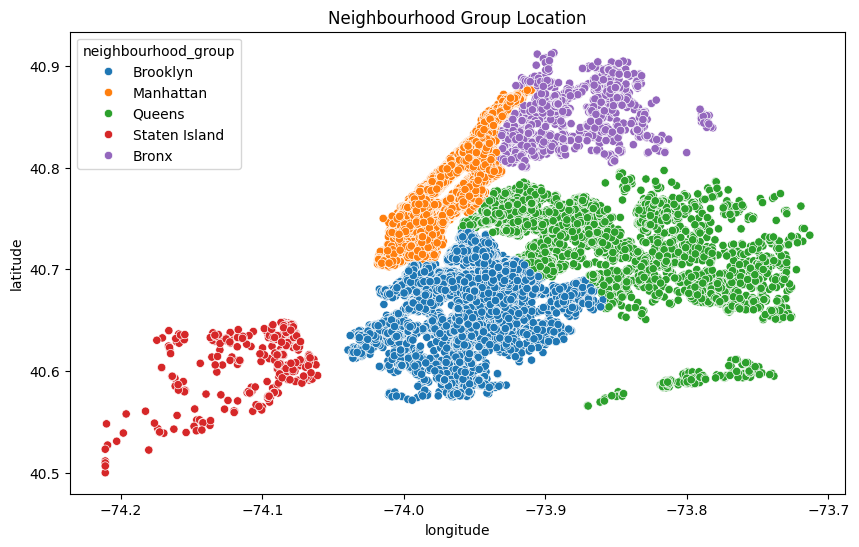

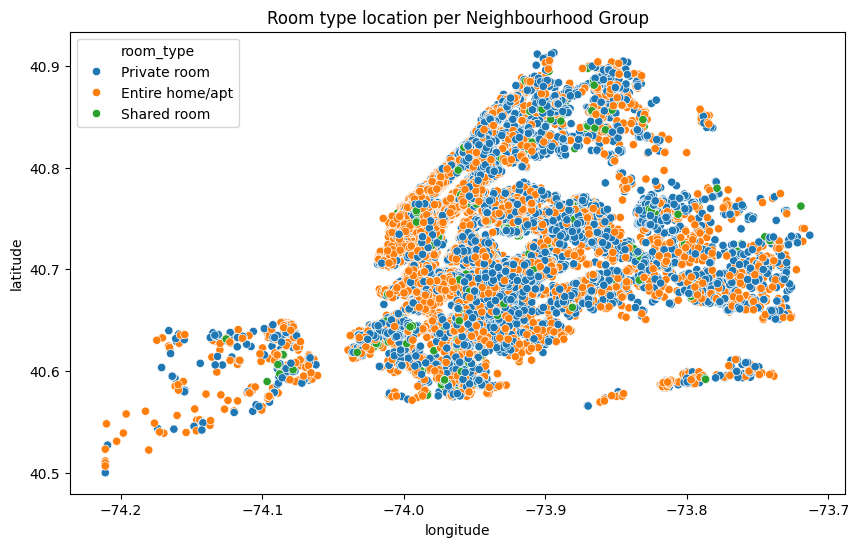

In [39]:
title = 'Neighbourhood Group Location'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df).set_title(title)
plt.ioff()

title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=df).set_title(title)
plt.ioff()


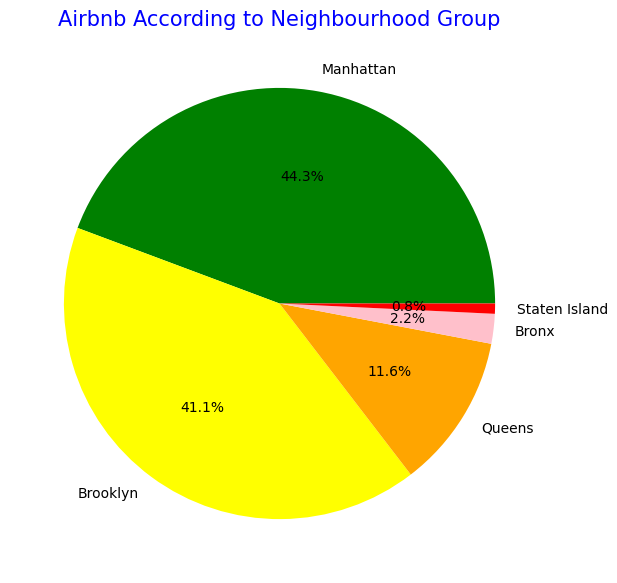

In [40]:
labels = df.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = df.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

## Price Distribution by Room Type in Neighbourhood Groups

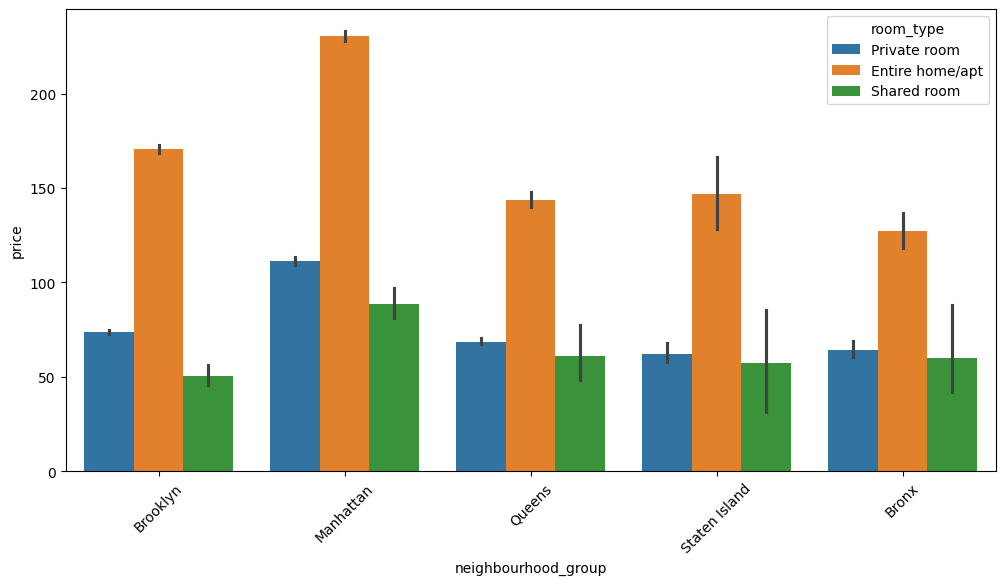

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = df)
plt.xticks(rotation=45)
plt.show()

## Comparison of Host Listing Counts by Neighbourhood Group

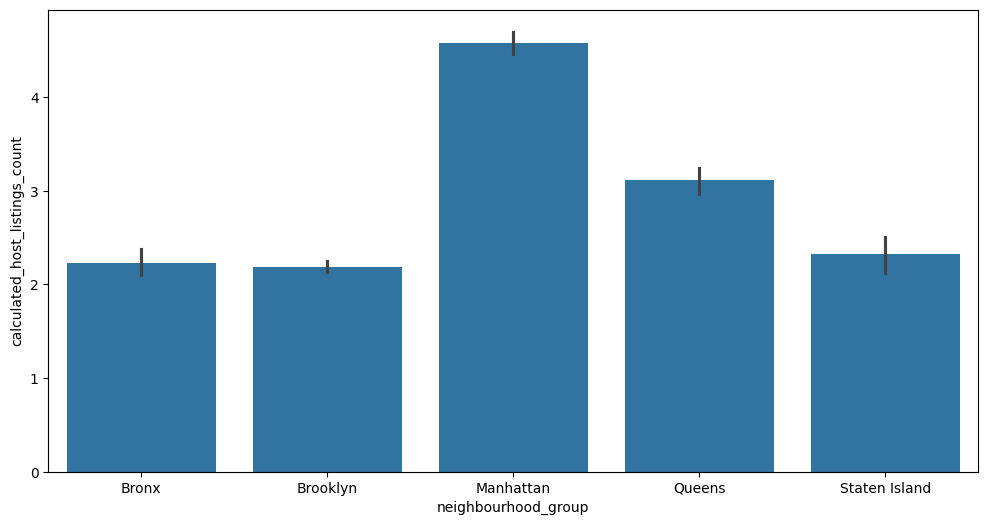

In [42]:
plt.figure(figsize=(12,6))

result = df.groupby(["neighbourhood_group"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')

sns.barplot(x='neighbourhood_group', y="calculated_host_listings_count", data=df, order=result['neighbourhood_group'])

plt.show()

## Comparison of Host Listing Counts by Room Type

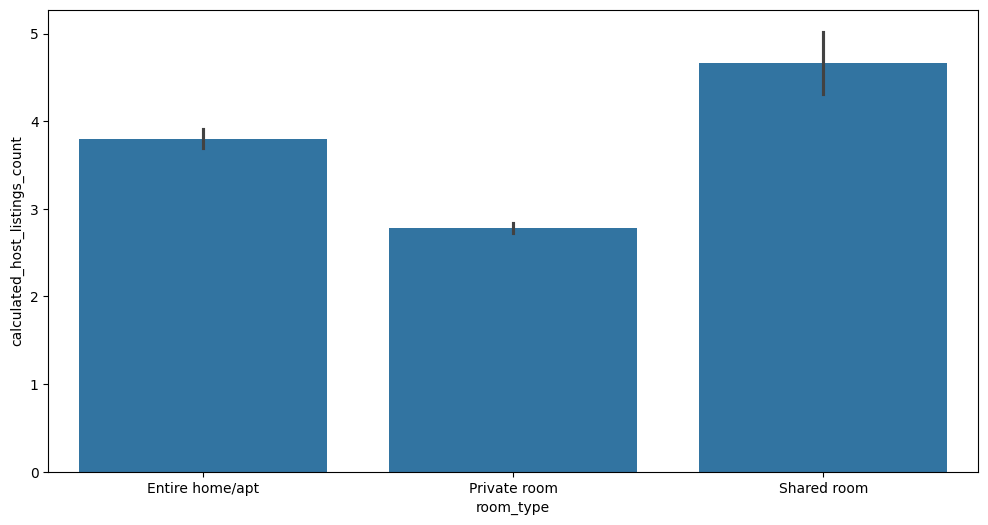

In [43]:
plt.figure(figsize=(12,6))

result = df.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')

sns.barplot(x='room_type', y="calculated_host_listings_count", data=df, order=result['room_type'])

plt.show()

## Comparison of Yearly Availability by Room Type

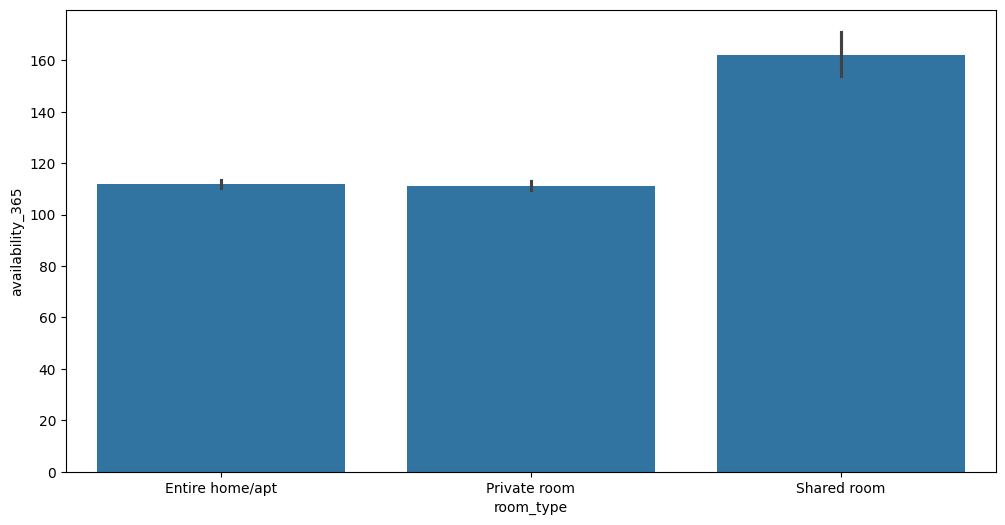

In [44]:
plt.figure(figsize=(12,6))

result = df.groupby(["room_type"])['availability_365'].aggregate(np.median).reset_index().sort_values('availability_365')

sns.barplot(x='room_type', y="availability_365", data=df, order=result['room_type'])

plt.show()

# 9. Analysis of Categorical Variables by Target

In [45]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

                     TARGET_MEAN
neighbourhood_group             
Bronx                     85.806
Brooklyn                 119.493
Manhattan                183.362
Queens                    96.176
Staten Island            102.031




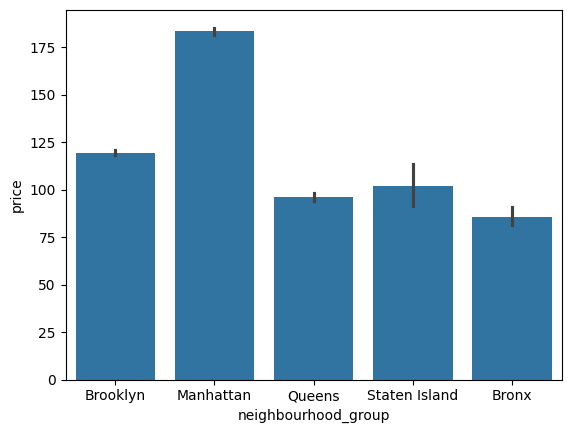

                 TARGET_MEAN
room_type                   
Entire home/apt      198.705
Private room          86.097
Shared room           68.628




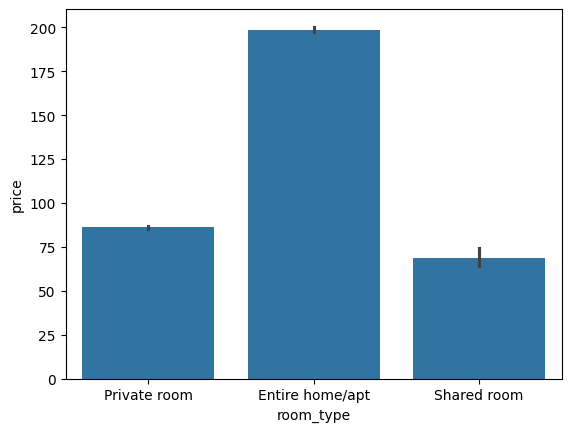

In [46]:
for col in cat_cols:
    target_summary_with_cat(df, 'price', col, plot=True)

# 10. Feature Extraction

In [47]:
# This feature can be used to estimate for how long a house has been listed. 
# This duration is calculated by dividing the total number of reviews that the house has received by the number of reviews per month.
df['NEW_estimated_listed_months'] = df['number_of_reviews'] / df['reviews_per_month']

# This feature gives the ratio of how long a house is available throughout the year.
df['NEW_availability_ratio'] = df['availability_365'] / 365

# This feature gives the daily average reviews a host receives. It divides the reviews per month by the number of days in a month.
df['NEW_daily_average_reviews'] = df['reviews_per_month'] / 30

# This feature estimates the average duration a customer stays. It divides the total number of reviews by the reviews per month.
df['NEW_average_stay_duration'] = df['number_of_reviews'] / df['reviews_per_month']

# This feature gives the occupancy  of a house throughout the year. It subtracts from 365 the number of days a house is available in a year.
df['NEW_house_occupancy_rate'] = (365 - df['availability_365']) / 365


In [48]:
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,NEW_estimated_listed_months,NEW_availability_ratio,NEW_daily_average_reviews,NEW_average_stay_duration,NEW_house_occupancy_rate
0,Brooklyn,40.647,-73.972,Private room,149.000,1.000,9,0.210,6,365,42.857,1.000,0.007,42.857,0.000
1,Manhattan,40.754,-73.984,Entire home/apt,225.000,1.000,45,0.380,2,355,118.421,0.973,0.013,118.421,0.027
2,Manhattan,40.809,-73.942,Private room,150.000,3.000,0,1.373,1,365,0.000,1.000,0.046,0.000,0.000
3,Brooklyn,40.685,-73.960,Entire home/apt,89.000,1.000,270,4.640,1,194,58.190,0.532,0.155,58.190,0.468
4,Manhattan,40.799,-73.944,Entire home/apt,80.000,10.000,9,0.100,1,0,90.000,0.000,0.003,90.000,1.000


# 11. Encoding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   latitude                        48895 non-null  float64
 2   longitude                       48895 non-null  float64
 3   room_type                       48895 non-null  object 
 4   price                           48895 non-null  float64
 5   minimum_nights                  48895 non-null  float64
 6   number_of_reviews               48895 non-null  int64  
 7   reviews_per_month               48895 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
 10  NEW_estimated_listed_months     48895 non-null  float64
 11  NEW_availability_ratio          48895 non-null  float64
 12  NEW_daily_average_reviews       

In [50]:
cat_cols, num_cols, cat_but_car,  num_but_cat = grab_col_names(df)

Observations: 48895
Variables: 15
cat_cols: 2
num_cols: 13
cat_but_car: 0
num_but_cat: 0


In [51]:
cat_cols

['neighbourhood_group', 'room_type']

In [52]:
num_cols

['latitude',
 'longitude',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'NEW_estimated_listed_months',
 'NEW_availability_ratio',
 'NEW_daily_average_reviews',
 'NEW_average_stay_duration',
 'NEW_house_occupancy_rate']

In [53]:
cat_but_car

[]

In [54]:
num_but_cat

[]

In [55]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [56]:
df = one_hot_encoder(df, cat_cols, drop_first=True)

In [57]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,NEW_estimated_listed_months,NEW_availability_ratio,NEW_daily_average_reviews,NEW_average_stay_duration,NEW_house_occupancy_rate,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,40.647,-73.972,149.000,1.000,9,0.210,6,365,42.857,1.000,0.007,42.857,0.000,True,False,False,False,True,False
1,40.754,-73.984,225.000,1.000,45,0.380,2,355,118.421,0.973,0.013,118.421,0.027,False,True,False,False,False,False
2,40.809,-73.942,150.000,3.000,0,1.373,1,365,0.000,1.000,0.046,0.000,0.000,False,True,False,False,True,False
3,40.685,-73.960,89.000,1.000,270,4.640,1,194,58.190,0.532,0.155,58.190,0.468,True,False,False,False,False,False
4,40.799,-73.944,80.000,10.000,9,0.100,1,0,90.000,0.000,0.003,90.000,1.000,False,True,False,False,False,False


Correlation between Availability and Price: 0.12294778918817781


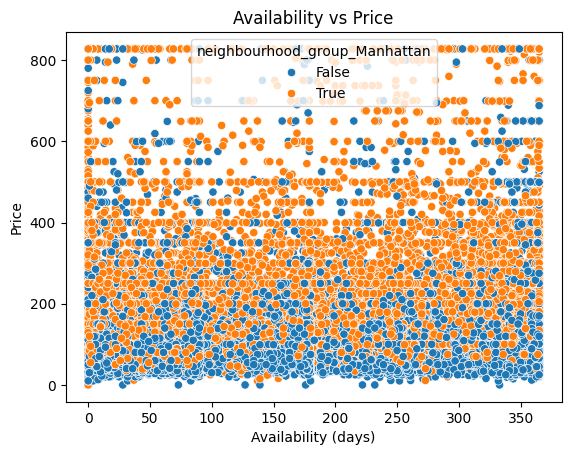

In [58]:

#  Calculation of price correlation with available reservation date
availability_price_corr, _ = pearsonr(df['availability_365'], df['price'])
print(f"Correlation between Availability and Price: {availability_price_corr}")

# 시각화
sns.scatterplot(data=df, x='availability_365', y='price', hue='neighbourhood_group_Manhattan')
plt.title('Availability vs Price')
plt.xlabel('Availability (days)')
plt.ylabel('Price')
plt.show()


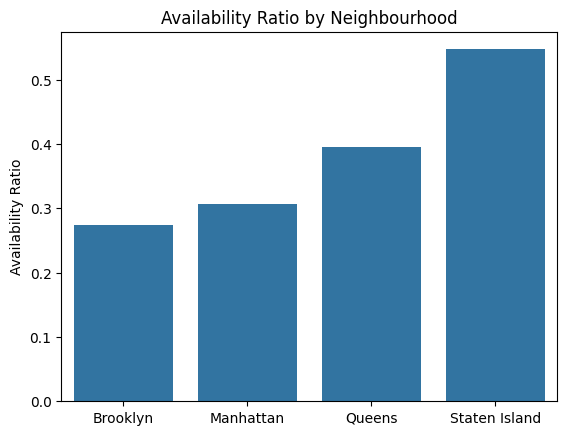

In [59]:
# Calculation of Reserved Percentage by Region
availability_ratio_by_neighbourhood = df.groupby('neighbourhood_group_Manhattan')['NEW_availability_ratio'].mean()

# visualization
sns.barplot(x=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island'], 
            y=[df[df['neighbourhood_group_Brooklyn'] == True]['NEW_availability_ratio'].mean(),
               df[df['neighbourhood_group_Manhattan'] == True]['NEW_availability_ratio'].mean(),
               df[df['neighbourhood_group_Queens'] == True]['NEW_availability_ratio'].mean(),
               df[df['neighbourhood_group_Staten Island'] == True]['NEW_availability_ratio'].mean()])
plt.title('Availability Ratio by Neighbourhood')
plt.ylabel('Availability Ratio')
plt.show()


In [60]:
# Editing of variable names.

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^A-Za-z0-9_]+', '')
df.columns = df.columns.str.lower()

In [61]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,new_estimated_listed_months,new_availability_ratio,new_daily_average_reviews,new_average_stay_duration,new_house_occupancy_rate,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten_island,room_type_private_room,room_type_shared_room
0,40.647,-73.972,149.000,1.000,9,0.210,6,365,42.857,1.000,0.007,42.857,0.000,True,False,False,False,True,False
1,40.754,-73.984,225.000,1.000,45,0.380,2,355,118.421,0.973,0.013,118.421,0.027,False,True,False,False,False,False
2,40.809,-73.942,150.000,3.000,0,1.373,1,365,0.000,1.000,0.046,0.000,0.000,False,True,False,False,True,False
3,40.685,-73.960,89.000,1.000,270,4.640,1,194,58.190,0.532,0.155,58.190,0.468,True,False,False,False,False,False
4,40.799,-73.944,80.000,10.000,9,0.100,1,0,90.000,0.000,0.003,90.000,1.000,False,True,False,False,False,False


# 12. Separating data frames by Manhattan

In [62]:
m_true = df[df["neighbourhood_group_manhattan"] == True]
m_false = df[df["neighbourhood_group_manhattan"] == False]

In [63]:
m_true.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,new_estimated_listed_months,new_availability_ratio,new_daily_average_reviews,new_average_stay_duration,new_house_occupancy_rate,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten_island,room_type_private_room,room_type_shared_room
1,40.754,-73.984,225.000,1.000,45,0.380,2,355,118.421,0.973,0.013,118.421,0.027,False,True,False,False,False,False
2,40.809,-73.942,150.000,3.000,0,1.373,1,365,0.000,1.000,0.046,0.000,0.000,False,True,False,False,True,False
4,40.799,-73.944,80.000,10.000,9,0.100,1,0,90.000,0.000,0.003,90.000,1.000,False,True,False,False,False,False
5,40.748,-73.975,200.000,3.000,74,0.590,1,129,125.424,0.353,0.020,125.424,0.647,False,True,False,False,False,False
7,40.765,-73.985,79.000,2.000,285,3.470,1,220,82.133,0.603,0.116,82.133,0.397,False,True,False,False,True,False


In [64]:
len(m_true)

21661

In [65]:
m_false.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,new_estimated_listed_months,new_availability_ratio,new_daily_average_reviews,new_average_stay_duration,new_house_occupancy_rate,neighbourhood_group_brooklyn,neighbourhood_group_manhattan,neighbourhood_group_queens,neighbourhood_group_staten_island,room_type_private_room,room_type_shared_room
0,40.647,-73.972,149.000,1.000,9,0.210,6,365,42.857,1.000,0.007,42.857,0.000,True,False,False,False,True,False
3,40.685,-73.960,89.000,1.000,270,4.640,1,194,58.190,0.532,0.155,58.190,0.468,True,False,False,False,False,False
6,40.687,-73.956,60.000,45.000,49,0.400,1,0,122.500,0.000,0.013,122.500,1.000,True,False,False,False,True,False
12,40.668,-73.988,89.000,4.000,167,1.340,3,314,124.627,0.860,0.045,124.627,0.140,True,False,False,False,True,False
15,40.708,-73.954,140.000,2.000,148,1.200,1,46,123.333,0.126,0.040,123.333,0.874,True,False,False,False,False,False


In [66]:
len(m_false)

27234

# 13. Creating Model

In [67]:
m_y = m_true["price"]

In [68]:
y = m_false["price"] ##from m_false dataframe

In [69]:
m_X = m_true.drop(["price"], axis=1)

In [70]:
X = m_false.drop(["price"], axis=1) ##from m_false dataframe

In [71]:
##from m_true dataframe
m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(m_X, m_y, test_size=0.20, random_state=17) 

In [72]:
##from m_false dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17) 

RMSE: 121.5432 (LR)
R^2 Score: 0.2828 (LR)
MAE: 73.9203 (LR)
MSE: 13826.193 (LR)
Execution Time: 0.15 seconds

RMSE: 121.6067 (Ridge)
R^2 Score: 0.2816 (Ridge)
MAE: 73.8771 (Ridge)
MSE: 13847.8828 (Ridge)
Execution Time: 0.34 seconds

RMSE: 125.1809 (Lasso)
R^2 Score: 0.2314 (Lasso)
MAE: 77.6748 (Lasso)
MSE: 14817.1002 (Lasso)
Execution Time: 0.24 seconds

RMSE: 132.6337 (ElasticNet)
R^2 Score: 0.135 (ElasticNet)
MAE: 85.683 (ElasticNet)
MSE: 16674.1207 (ElasticNet)
Execution Time: 0.25 seconds

RMSE: 145.2947 (KNN)
R^2 Score: 0.0903 (KNN)
MAE: 88.5104 (KNN)
MSE: 17536.0691 (KNN)
Execution Time: 2.31 seconds

RMSE: 184.2639 (CART)
R^2 Score: -0.2005 (CART)
MAE: 87.1552 (CART)
MSE: 23141.3267 (CART)
Execution Time: 2.47 seconds

RMSE: 125.4355 (RF)
R^2 Score: 0.4079 (RF)
MAE: 65.3995 (RF)
MSE: 11414.2493 (RF)
Execution Time: 131.2 seconds

RMSE: 116.2801 (CatBoost)
R^2 Score: 0.4431 (CatBoost)
MAE: 63.6945 (CatBoost)
MSE: 10735.1137 (CatBoost)
Execution Time: 25.7 seconds



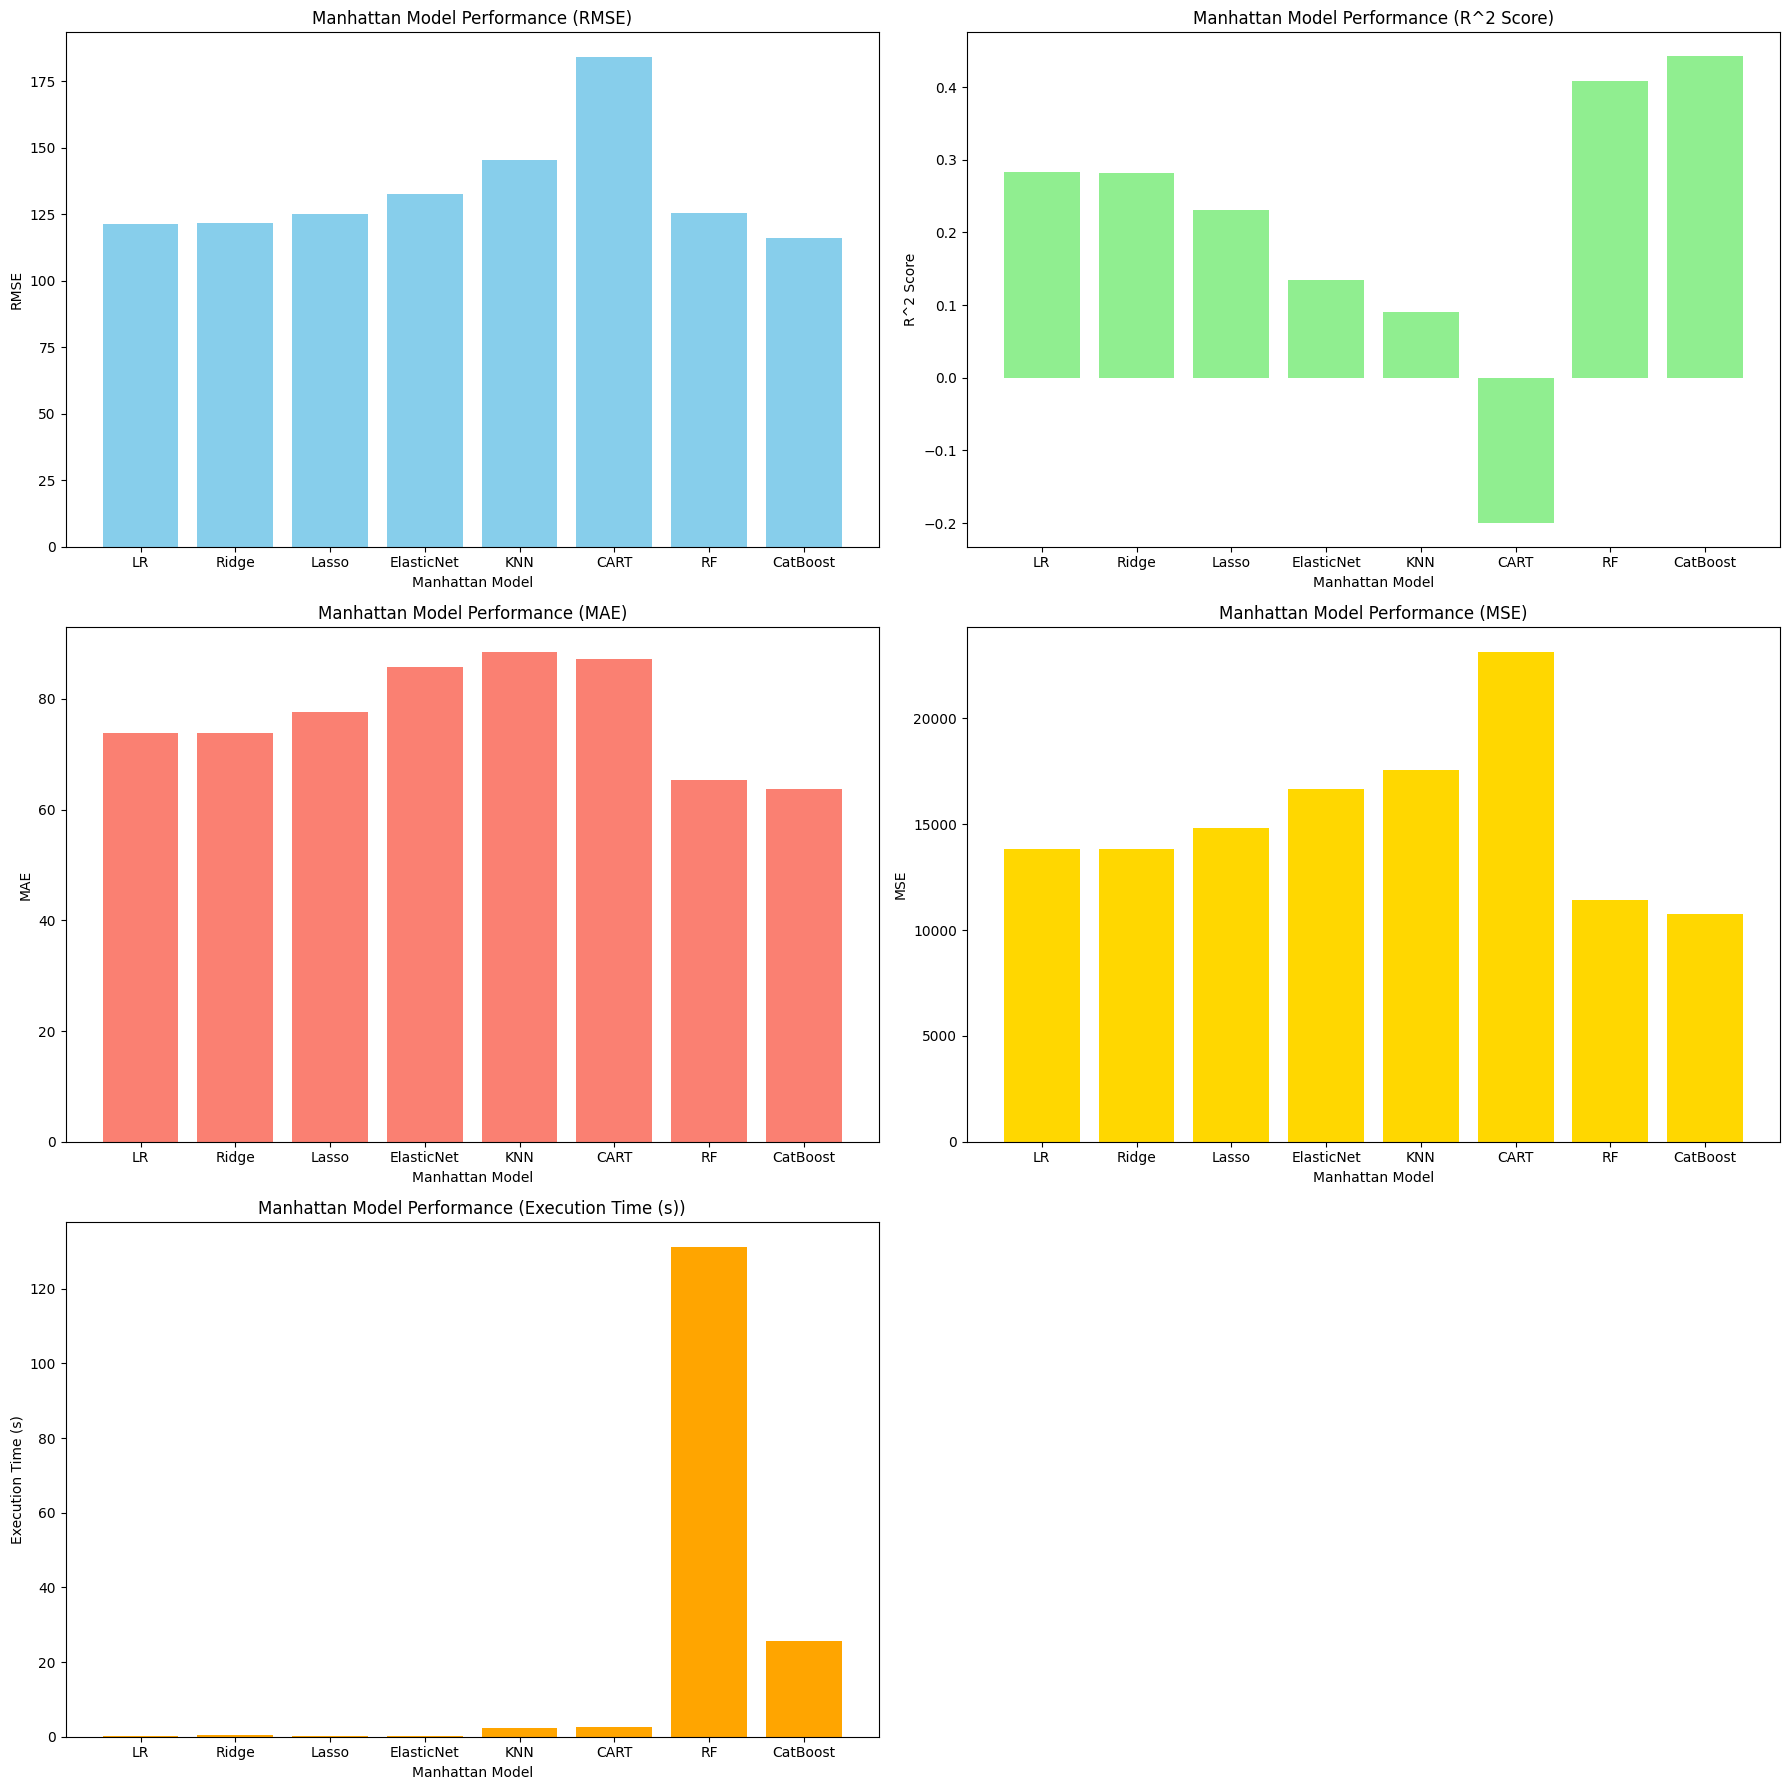

In [73]:
## m_true dataframe

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(m_X_train, m_y_train)

    # Make predictions
    m_y_pred = regressor.predict(m_X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, m_X, m_y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)
    
    # Calculate R^2 score
    r2 = metrics.r2_score(m_y_test, m_y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(m_y_test, m_y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(m_y_test, m_y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot all metrics in one figure
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Define metrics and colors
metrics_data = [
    ("RMSE", rmse_scores, 'skyblue'),
    ("R^2 Score", r2_scores, 'lightgreen'),
    ("MAE", mae_scores, 'salmon'),
    ("MSE", mse_scores, 'gold'),
    ("Execution Time (s)", execution_times, 'orange')
]

# Plot each metric
for i, (metric_name, metric_values, color) in enumerate(metrics_data):
    ax = axs[i // 2, i % 2]
    ax.bar([name for name, _ in models], metric_values, color=color)
    ax.set_title(f"Manhattan Model Performance ({metric_name})")
    ax.set_xlabel("Manhattan Model")
    ax.set_ylabel(metric_name)

# Hide the empty subplot if metrics < subplots
if len(metrics_data) < len(axs.flatten()):
    axs[-1, -1].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


RMSE: 81.9869 (LR)
R^2 Score: 0.2729 (LR)
MAE: 45.606 (LR)
MSE: 6951.4897 (LR)
Execution Time: 0.21 seconds

RMSE: 81.9875 (Ridge)
R^2 Score: 0.2727 (Ridge)
MAE: 45.5985 (Ridge)
MSE: 6952.7141 (Ridge)
Execution Time: 0.14 seconds

RMSE: 82.9927 (Lasso)
R^2 Score: 0.2568 (Lasso)
MAE: 46.1089 (Lasso)
MSE: 7104.8103 (Lasso)
Execution Time: 0.32 seconds

RMSE: 89.5403 (ElasticNet)
R^2 Score: 0.1285 (ElasticNet)
MAE: 53.4293 (ElasticNet)
MSE: 8331.5719 (ElasticNet)
Execution Time: 0.29 seconds

RMSE: 100.6844 (KNN)
R^2 Score: -0.0481 (KNN)
MAE: 60.9901 (KNN)
MSE: 10019.4652 (KNN)
Execution Time: 2.95 seconds

RMSE: 137.8299 (CART)
R^2 Score: -0.2112 (CART)
MAE: 55.9528 (CART)
MSE: 11579.0234 (CART)
Execution Time: 3.09 seconds

RMSE: 84.3029 (RF)
R^2 Score: 0.3752 (RF)
MAE: 41.547 (RF)
MSE: 5973.2652 (RF)
Execution Time: 190.67 seconds

RMSE: 77.4095 (CatBoost)
R^2 Score: 0.3961 (CatBoost)
MAE: 40.4597 (CatBoost)
MSE: 5773.2519 (CatBoost)
Execution Time: 28.3 seconds



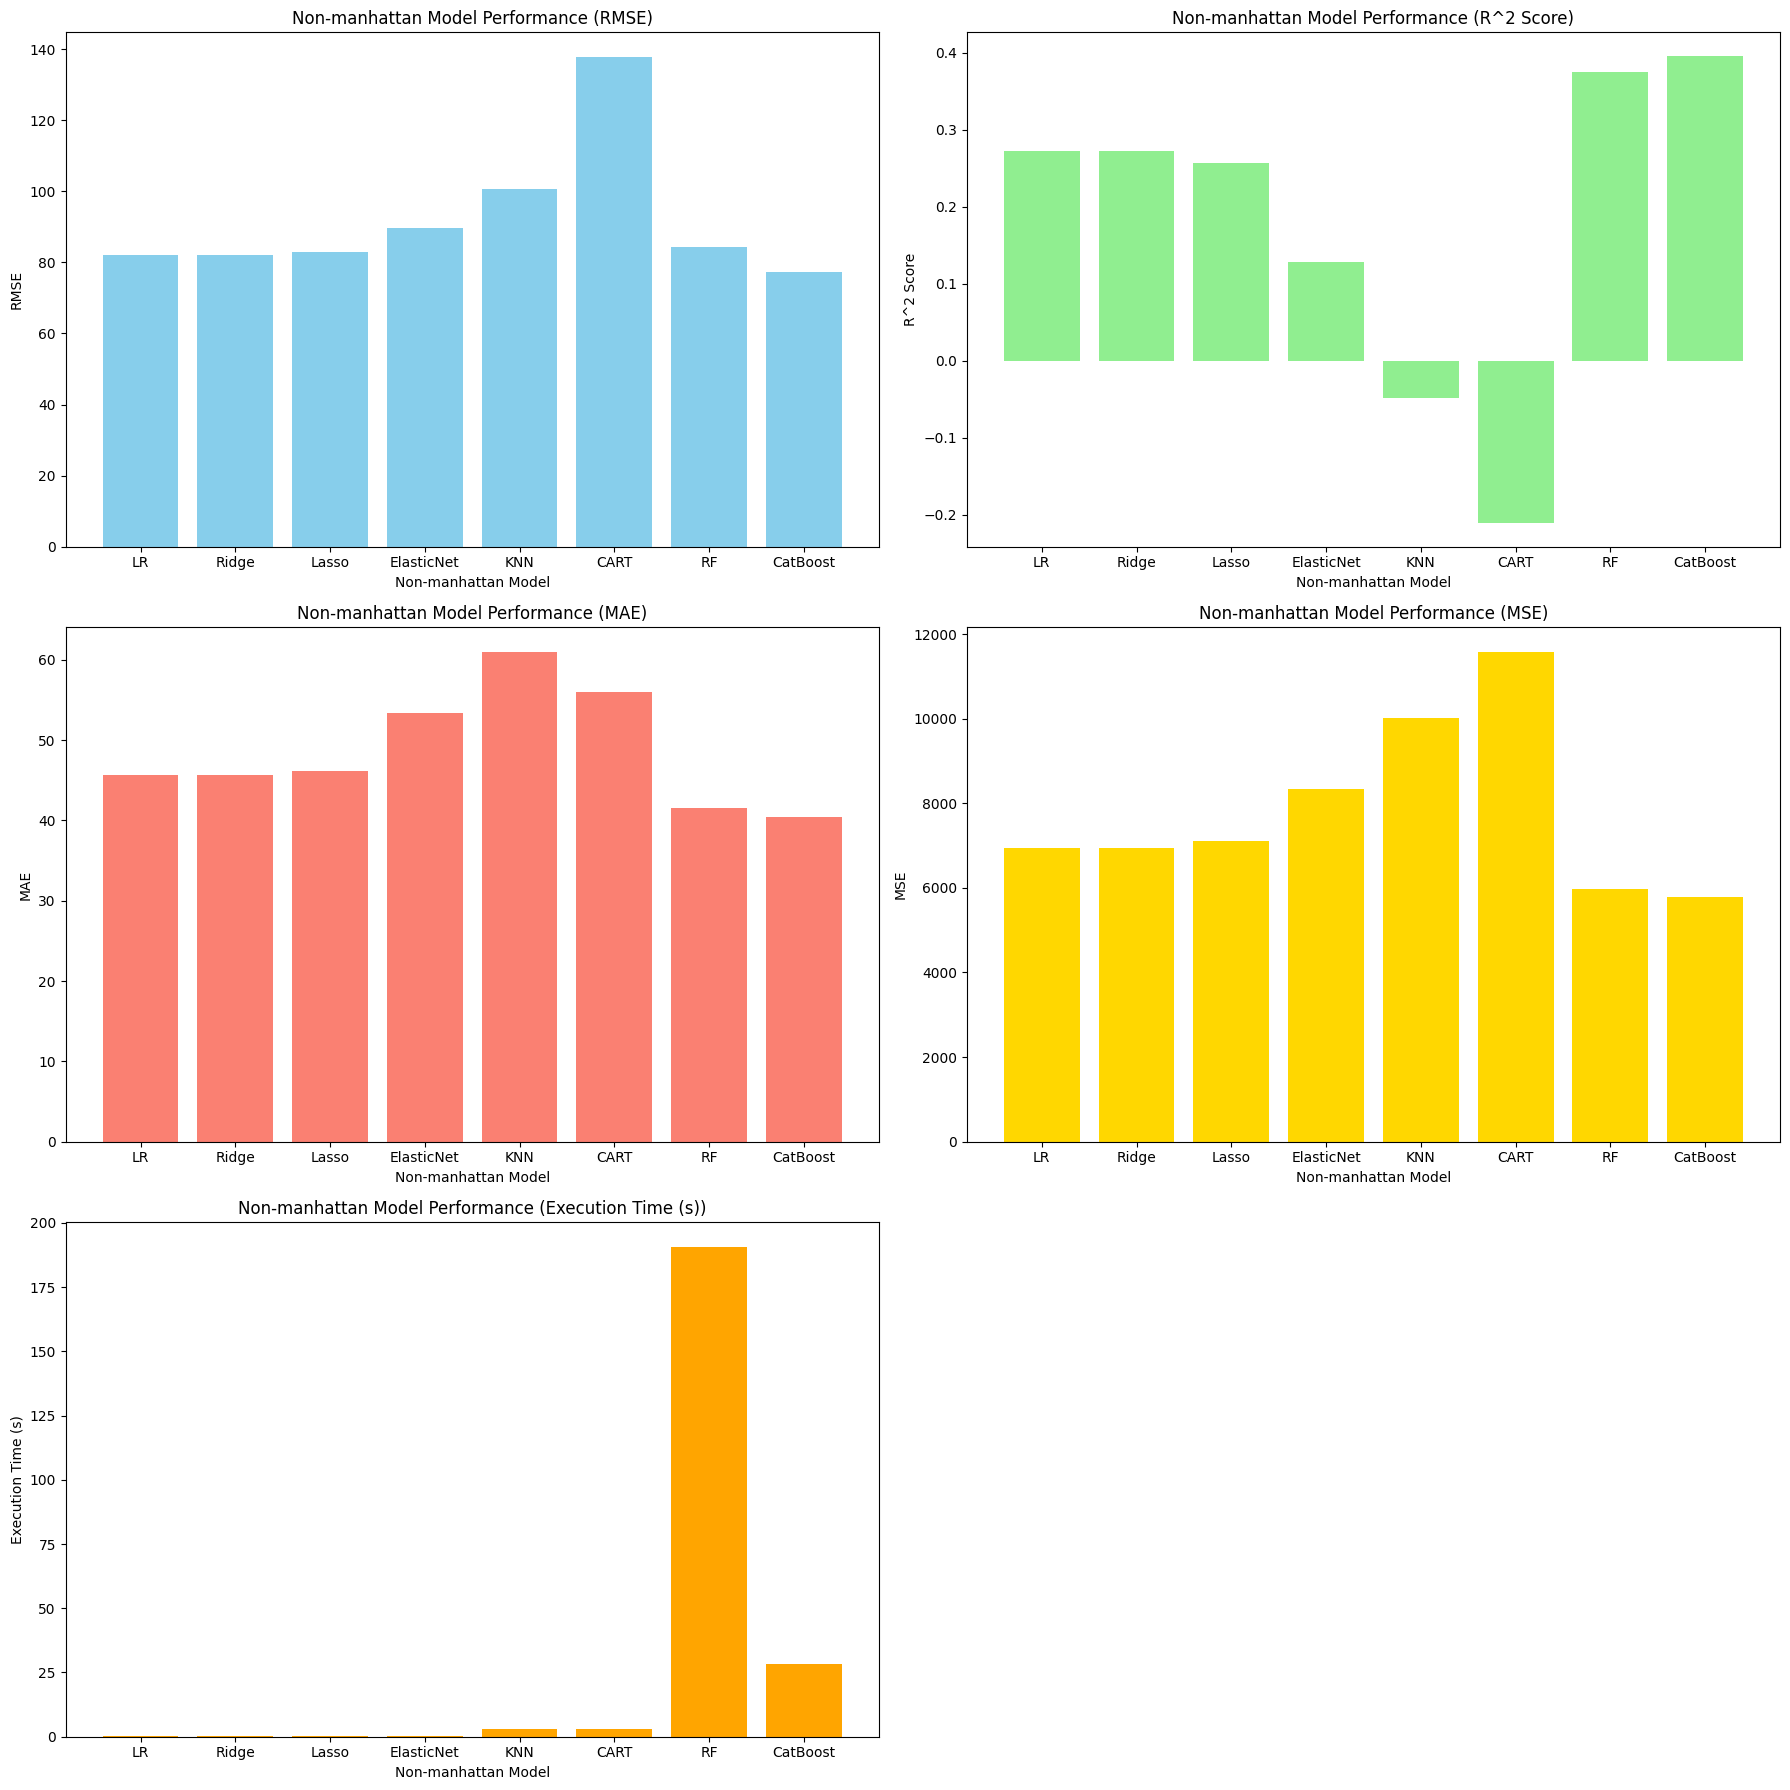

In [74]:
models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ("CatBoost", CatBoostRegressor(verbose=False))]

rmse_scores = []
r2_scores = []
mae_scores = []
mse_scores = []
execution_times = []

for name, regressor in models:
    start_time = time.time()

    # Fit the model
    regressor.fit(X_train, y_train)

    # Make predictions
    y_pred = regressor.predict(X_test)

    # Calculate RMSE
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    rmse_scores.append(rmse)
    
    # Calculate R^2 score
    r2 = metrics.r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Calculate MAE
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)

    # Calculate MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # Calculate the execution time of the model
    execution_time = time.time() - start_time
    execution_times.append(execution_time)

    print(f"RMSE: {round(rmse, 4)} ({name})")
    print(f"R^2 Score: {round(r2, 4)} ({name})")
    print(f"MAE: {round(mae, 4)} ({name})")
    print(f"MSE: {round(mse, 4)} ({name})")
    print(f"Execution Time: {round(execution_time, 2)} seconds\n")

# Plot all metrics in one figure
fig, axs = plt.subplots(3, 2, figsize=(18, 18))

# Define metrics and colors
metrics_data = [
    ("RMSE", rmse_scores, 'skyblue'),
    ("R^2 Score", r2_scores, 'lightgreen'),
    ("MAE", mae_scores, 'salmon'),
    ("MSE", mse_scores, 'gold'),
    ("Execution Time (s)", execution_times, 'orange')
]

# Plot each metric
for i, (metric_name, metric_values, color) in enumerate(metrics_data):
    ax = axs[i // 2, i % 2]
    ax.bar([name for name, _ in models], metric_values, color=color)
    ax.set_title(f"Non-manhattan Model Performance ({metric_name})")
    ax.set_xlabel("Non-manhattan Model")
    ax.set_ylabel(metric_name)

# Hide the empty subplot if metrics < subplots
if len(metrics_data) < len(axs.flatten()):
    axs[-1, -1].axis("off")

# Adjust layout and show
plt.tight_layout()
plt.show()


# 14. Final Model Predictions and Comparison with True Prices

In [75]:
## m_true data
m_best_model = CatBoostRegressor(verbose=False)
# 모델 학습 (fit)
m_best_model.fit(m_X_train, m_y_train)

In [76]:
best_model = CatBoostRegressor(verbose=False)
# 모델 학습 (fit)
best_model.fit(X_train, y_train)

In [77]:
## m_true dataframe
# Final Prediction Model
m_final_model = m_best_model

# Make predictions on the test set using the final model
m_y_final_pred = m_final_model.predict(m_X_test)
m_final_y_pred = (m_y_final_pred)
m_final_y_test =(m_y_test)

In [78]:
# none manhattan
# Final Prediction Model
final_model = best_model

# Make predictions on the test set using the final model
y_final_pred = final_model.predict(X_test)
final_y_pred = (y_final_pred)
final_y_test =(y_test)

In [79]:
# m_true dataframe
# Create a DataFrame with the predicted prices and true prices
m_results = pd.DataFrame({'Predicted Price': m_final_y_pred, 'True Price': m_final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
m_results['Difference'] = m_results['True Price'] - m_results['Predicted Price']

# Display the results
print(m_results)

       Predicted Price  True Price  Difference
20653          184.489     150.000     -34.489
47992          345.018     269.000     -76.018
28198          309.166     245.000     -64.166
2588           200.217     190.000     -10.217
30919           97.377     159.000      61.623
8722           146.096     250.000     103.904
1289            75.248      99.000      23.752
17267          179.787     198.000      18.213
42069          191.946     100.000     -91.946
10611          175.140     120.000     -55.140
39687          158.799     140.000     -18.799
15622          175.399     275.000      99.601
37565          153.449     200.000      46.551
23728          168.251     135.000     -33.251
4954            71.286     200.000     128.714
16679          176.418     150.000     -26.418
48681          200.740     198.000      -2.740
5101           124.581     118.000      -6.581
38696          336.191     265.000     -71.191
32231          105.477      76.000     -29.477
45737        

In [80]:
# Create a DataFrame with the predicted prices and true prices
results = pd.DataFrame({'Predicted Price': final_y_pred, 'True Price': final_y_test})

# Calculate the difference between the true prices and predicted prices and add a new column
results['Difference'] = results['True Price'] - results['Predicted Price']

# Display the results
print(results)

       Predicted Price  True Price  Difference
42191          150.829     120.000     -30.829
15859          148.827     100.000     -48.827
23409          139.523     200.000      60.477
17562          136.927     129.000      -7.927
45293           58.882      99.000      40.118
6143            39.698      50.000      10.302
30719          145.317     220.000      74.683
7986           146.439     110.000     -36.439
8778           114.456     100.000     -14.456
25440           65.733      63.000      -2.733
46907           71.457      60.000     -11.457
29215           57.253      50.000      -7.253
32342          110.232     100.000     -10.232
47516          176.585     199.000      22.415
38071          146.318      85.000     -61.318
1573           152.346     120.000     -32.346
48701           65.818      45.000     -20.818
47512          139.174      86.000     -53.174
47572          154.876     100.000     -54.876
16359          152.680     150.000      -2.680
11762        

# 15. Feature Importance

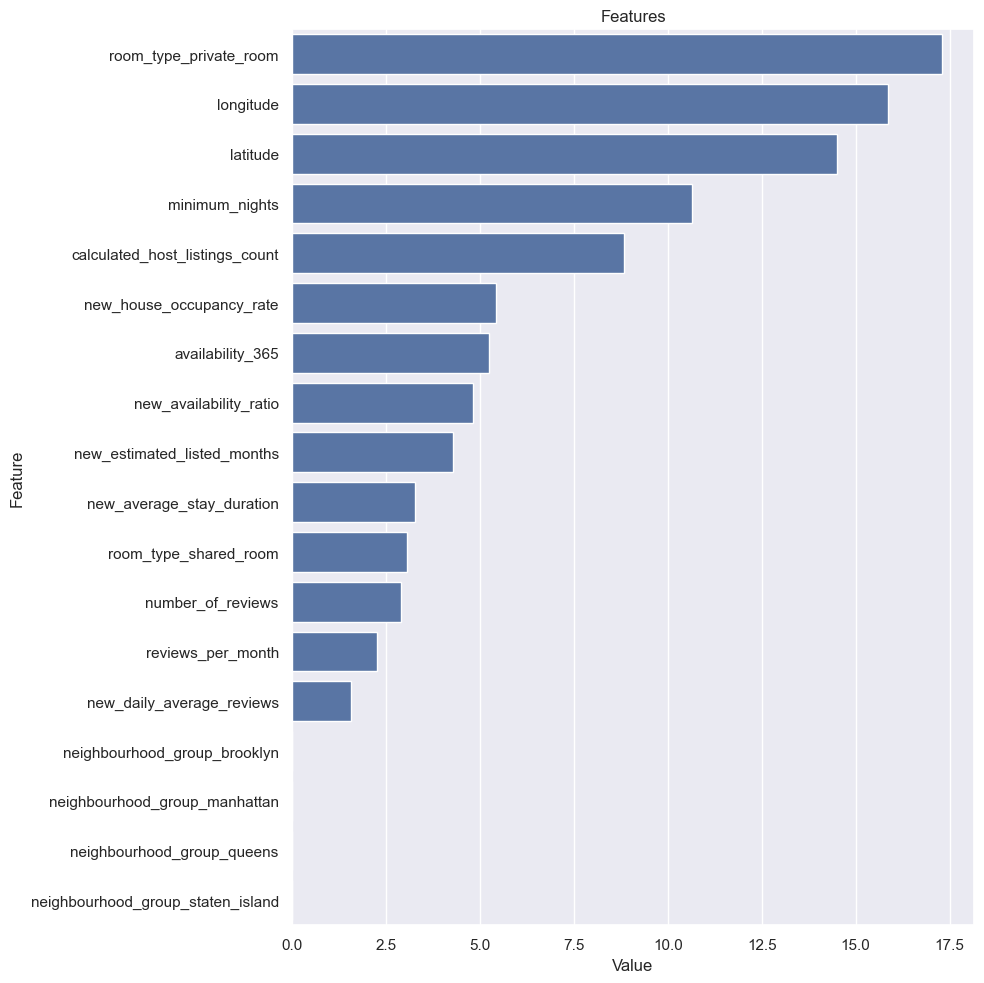

    Value                            Feature
16 17.284             room_type_private_room
1  15.864                          longitude
0  14.492                           latitude
2  10.653                     minimum_nights
5   8.838     calculated_host_listings_count
11  5.418           new_house_occupancy_rate
6   5.255                   availability_365
8   4.813             new_availability_ratio
7   4.283        new_estimated_listed_months
10  3.281          new_average_stay_duration
17  3.073              room_type_shared_room
3   2.903                  number_of_reviews
4   2.265                  reviews_per_month
9   1.577          new_daily_average_reviews
12  0.000       neighbourhood_group_brooklyn
13  0.000      neighbourhood_group_manhattan
14  0.000         neighbourhood_group_queens
15  0.000  neighbourhood_group_staten_island


In [81]:
def plot_importance(model, features, num=50, save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig('importances.png')
    print(feature_imp.sort_values(by="Value", ascending=False))
plot_importance(m_final_model, m_X) #m_true data

# def plot_importance(model, features, num=50, save=False):
#     feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
#     print(feature_imp.sort_values(by="Value", ascending=False))
    
# plot_importance(m_final_model, m_X) #m_true data
# print('                  Manhattan                  ')
# print('#############################################')
# plot_importance(final_model, X) # m_false data
# print('                Non-Manhattan                ')


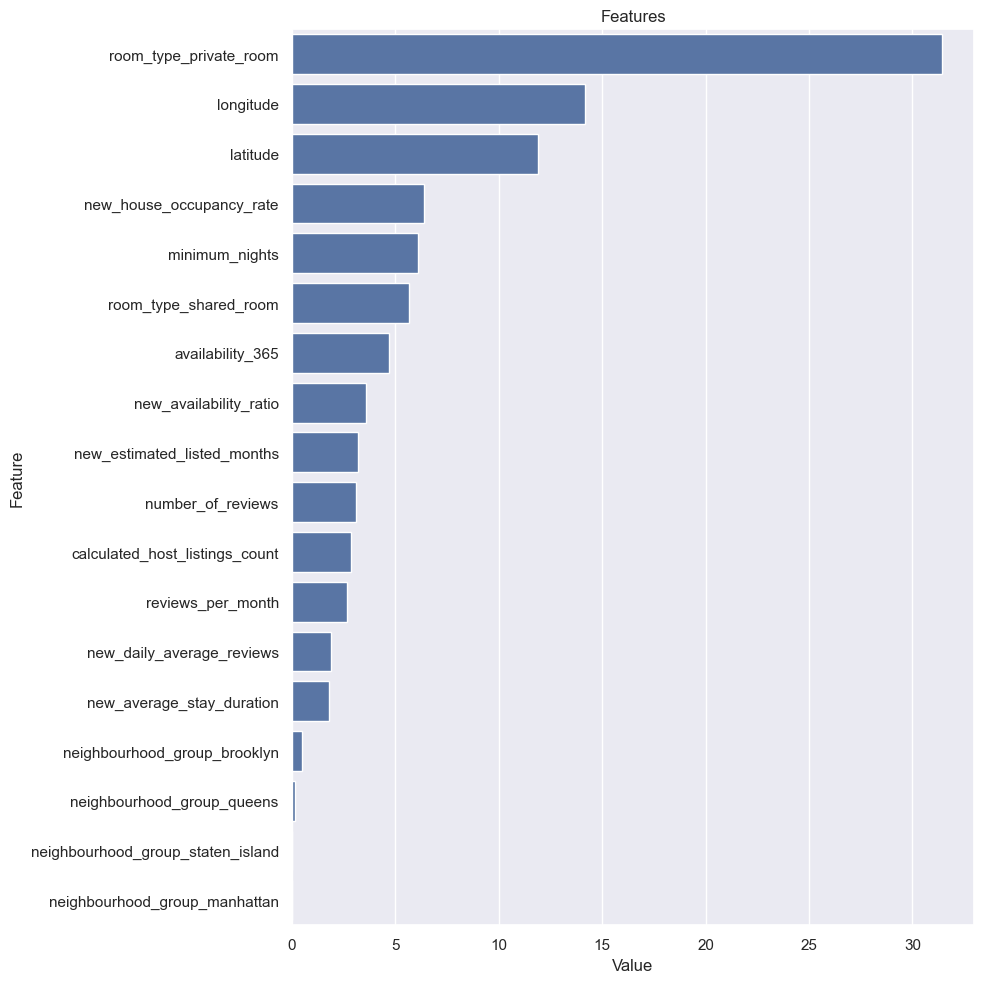

    Value                            Feature
16 31.407             room_type_private_room
1  14.177                          longitude
0  11.876                           latitude
11  6.406           new_house_occupancy_rate
2   6.109                     minimum_nights
17  5.659              room_type_shared_room
6   4.680                   availability_365
8   3.569             new_availability_ratio
7   3.180        new_estimated_listed_months
3   3.095                  number_of_reviews
5   2.832     calculated_host_listings_count
4   2.683                  reviews_per_month
9   1.908          new_daily_average_reviews
10  1.794          new_average_stay_duration
12  0.484       neighbourhood_group_brooklyn
14  0.123         neighbourhood_group_queens
15  0.016  neighbourhood_group_staten_island
13  0.000      neighbourhood_group_manhattan


In [82]:

plot_importance(final_model, X) # m_false data